# Physical Models of Living Systems: Homework 4
Laura Schulze (2122311)

*Using non-homogeneous Poisson process, generate the spike train of 100 neurons (if your code is efficient you can also do more, e.g. 200 and $T=100s$)*

*Do this for two different situations:*

1) *The firing rate $\lambda_t$ is independent for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) = r \exp [- r \lambda_t]$ with $r=0.1$*

2) *The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) = r \exp [- r \lambda_t]$ with $r=0.1.$*

3) *The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by gamma distribution with mean 0.2 and variance 10.*

*For both cases you can use a time step $dt=0.01$. I remember you that the probability of a spike is $\lambda_t * dt$. Do at least 10000 time steps.*

*What is the differences in terms of neural avalanches for the two cases? You can, if you want, characterize the avalanches size distributions, remembering that an avalanche size is defined the total number of neurons spiking between to period of total silence (no neurons spiking).*

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# some useful plotting functions
def plot_spike_train(spike_array, dt=0.01, neuron_idx=None):
    if spike_array.ndim == 2: # multiple neurons
        Nt, Nn = spike_array.shape   
        if neuron_idx is None: 
            neuron_idx = range(Nn)
        else:
            Nn = len(neuron_idx)
        fig, ax = plt.subplots(nrows = Nn, tight_layout=True, sharex = True, figsize=(10, Nn))
        ax[-1].set_xlabel("Time [s]")
        for i in range(Nn):
            spike_times = np.argwhere(spike_array[:, neuron_idx[i]]) * dt
            ax[i].vlines(spike_times, 0, 1)
            ax[i].set_ylabel(f"Neuron {neuron_idx[i]+1}")
            ax[i].tick_params(axis='y',
                       which='both',
                       left=False,
                       right=False,
                       labelleft=False)     
        fig.suptitle("Neuron spike trains")

    else: # only 1 neuron
        spike_times = np.argwhere(spike_array)*dt
        fig, ax = plt.subplots(tight_layout=True, figsize=(10, 2))
        ax.vlines(spike_times, 0, 1)
        ax.set_ylabel(f"Neuron spikes")
        ax.set_xlabel("Time [s]")
        ax.tick_params(axis='y',
                       which='both',
                       left=False,
                       right=False,
                       labelleft=False)     
    plt.show()

def plot_spike_stats(spike_array, dt, Nt):
    spikes_summed = np.sum(spike_array, axis=1)
    time = np.arange(Nt)*dt
    fig, ax = plt.subplots(tight_layout=True, figsize=(10, 5))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("# neuron spikes")
    ax.set_title("Total neuron spikes over time")
    ax.grid()
    ax.bar(time, spikes_summed, width=dt, align='edge')
    #ax.plot(time, spikes_summed)
    plt.show

def plot_spike_times(spike_idx, dt=0.01, neuron_idx=None):
    if len(spike_idx) > 1: # multiple neurons
        if neuron_idx is None: 
            neuron_idx = range(Nn)
        else:
            Nn = len(neuron_idx)
        fig, ax = plt.subplots(nrows = Nn, tight_layout=True, sharex = True, figsize=(10, Nn))
        ax[-1].set_xlabel("Time [s]")
        for i in range(Nn):
            ax[i].vlines(dt*spike_idx[neuron_idx[i]], 0, 1)
            ax[i].set_ylabel(f"Neuron {neuron_idx[i]+1}")
            ax[i].tick_params(axis='y',
                       which='both',
                       left=False,
                       right=False,
                       labelleft=False)     
        fig.suptitle("Neuron spike trains")

    else: # only 1 neuron
        fig, ax = plt.subplots(tight_layout=True, figsize=(10, 2))
        ax.vlines(dt*spike_idx, 0, 1)
        ax.set_ylabel(f"Neuron spikes")
        ax.set_xlabel("Time [s]")
        ax.tick_params(axis='y',
                       which='both',
                       left=False,
                       right=False,
                       labelleft=False)     
    plt.show()

def plot_spike_time_stats(spike_time_idx, dt, Nt):
    all_idx = np.concatenate(spike_time_idx)  # put spike data of all neurons into one flat array
    #times, counts = np.unique(all_idx, return_counts=True)
    counts, _ = np.histogram(all_idx, bins=Nt, range=(0, Nt))
    times = np.arange(Nt) * dt
    fig, ax = plt.subplots(tight_layout=True, figsize=(10, 5))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("# neuron spikes")
    ax.set_title("Total neuron spikes over time")
    ax.grid()
    ax.bar(times, counts, width=dt, align='edge')
    #ax.plot(times, counts)
    plt.show()

def plot_firing_rates(lambda_t, dt=0.01, neuron_idx=None):
    fig, ax = plt.subplots(tight_layout=True, figsize=(10, 4))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Firing rate")
    ax.set_title("Firing rates over time")
    ax.grid()
    if lambda_t.ndim == 1:
        #ax.plot(time, lambda_t, 'o-', markersize=3)
        time = np.arange(0, len(lambda_t)*dt, dt)
        ax.plot(time, lambda_t)
    else: 
        time = np.arange(0, lambda_t.shape[0]*dt, dt)
        if neuron_idx is None: 
            neuron_idx = range(lambda_t.shape[1])
        for i in neuron_idx:
            ax.plot(time, lambda_t[:, i], label=f"Neuron {i+1}")
        ax.legend()
    plt.show()
    
def plot_avg_firing_rate(lambda_t, dt=0.01):
    fig, ax = plt.subplots(tight_layout=True, figsize=(10, 4))
    ax.set_xlabel("Time [s]")
    ax.set_ylabel("Firing rate")
    ax.set_title("Average firing rate over time")
    ax.grid()
    if lambda_t.ndim == 1:
        #ax.plot(time, lambda_t, 'o-', markersize=3)
        time = np.arange(0, len(lambda_t)*dt, dt)
        ax.plot(time, lambda_t)
    else: 
        time = np.arange(0, lambda_t.shape[0]*dt, dt)
        avg_lambda = np.mean(lambda_t, axis=1)
        ax.plot(time, avg_lambda)
    plt.show()

## Exponential firing rate distribution
1) *The firing rate $\lambda_t$ is independent for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) = r \exp [- r \lambda_t]$ with $r=0.1$*

In [3]:
# parameters
r = 0.1
T = 100 # total time window in s
dt = 0.01 # time step in s
Nt = int(T/dt) # number of time steps
Nn = 100 # number of neurons

# generate firing rates
lambda_t_A = np.random.exponential(scale=1.0/r, size=(Nt, Nn))
lambda_max = np.max(lambda_t_A)
print(f"max. firing rate: {lambda_max}")

max. firing rate: 164.89905042342414


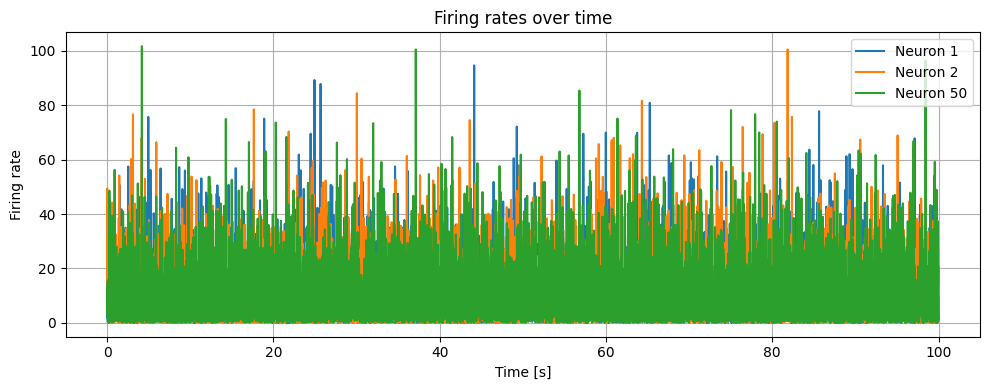

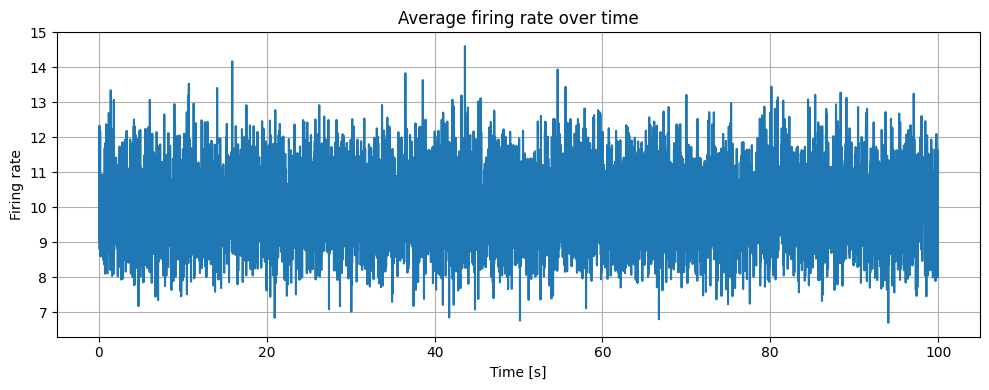

In [4]:
plot_firing_rates(lambda_t_A, dt, neuron_idx=[0, 1, 49])
plot_avg_firing_rate(lambda_t_A, dt)

(a) Generating spike train via Bernoulli trial with $p=\lambda_t\cdot dt$ for each bin 

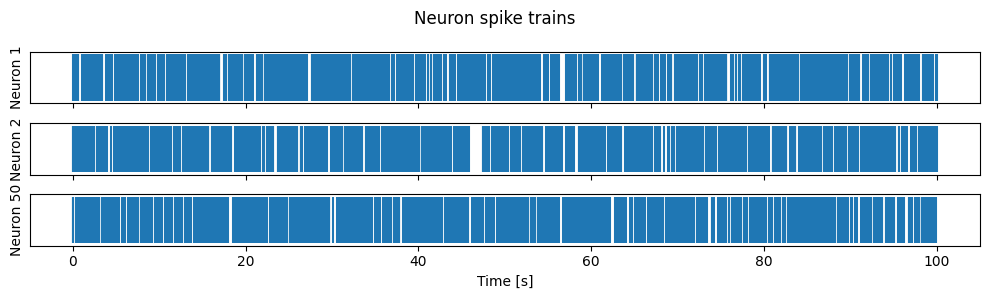

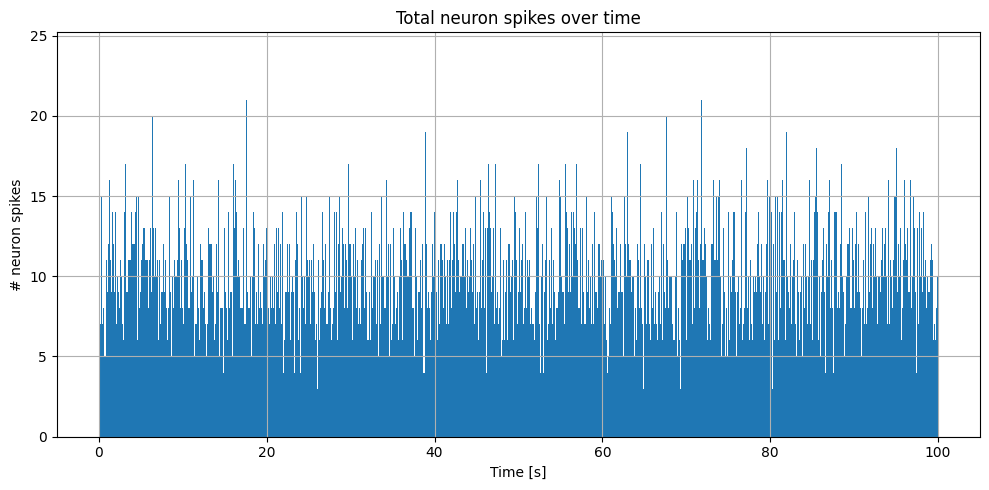

In [5]:
# generate spike train in each time bin from corresponding lambda
spike_train = np.less(np.random.uniform(size=(Nt, Nn)), lambda_t_A*dt).astype(int)
# plot
plot_spike_train(spike_train, dt, neuron_idx=[0, 1, 49])
plot_spike_stats(spike_train, dt, Nt)

...while we're at it, let's also try rejection sampling:

(b) Generating homogenous spike train by drawing number of spikes from Poisson distribution, draw spike times uniformly, then use rejection sampling 

In [6]:
def generate_spike_times(lambda_t, Nn=100):
        lambda_max = np.max(lambda_t)
        print(f"Max. firing rate: {lambda_max}")
        # generate number of spikes according to homogenous poisson distribution with lambda_max
        n_spikes = np.random.poisson(lam=lambda_max*T, size=Nn)
        print(f"Avg. number of spikes per neuron: {np.mean(n_spikes)}")
        # generate spike train by drawing random time bin index (discrete uniform)
        spike_idx = [np.random.randint(0, len(lambda_t), size=n) for n in n_spikes]
        
        # thinning
        spikes_idx_accepted = []
        if lambda_t.ndim == 2: # spike rates independent for each neuron:
            for n in range(Nn):
                idx = spike_idx[n]
                accept = np.greater(lambda_t[idx, n], np.random.uniform(size=len(idx))*lambda_max)
                spikes_idx_accepted.append(idx[accept])
            print(f"After Thinning: {sum([len(t) for t in spikes_idx_accepted])/Nn}")
            
        elif lambda_t.ndim == 1: # all neurons have the same spike rate
            for n in range(Nn):
                idx = spike_idx[n]
                accept = np.greater(lambda_t[idx], np.random.uniform(size=len(idx))*lambda_max)
                spikes_idx_accepted.append(idx[accept])
            print(f"After Thinning: {sum([len(t) for t in spikes_idx_accepted])/Nn}")

        else:
            print("Invalid dimensions: lambda_t must have ndim == 1 or ndim == 2!")
            
        return spikes_idx_accepted # note that these are indices, multiply with dt for spike times


Max. firing rate: 164.89905042342414
Avg. number of spikes per neuron: 16484.94
After Thinning: 1000.64


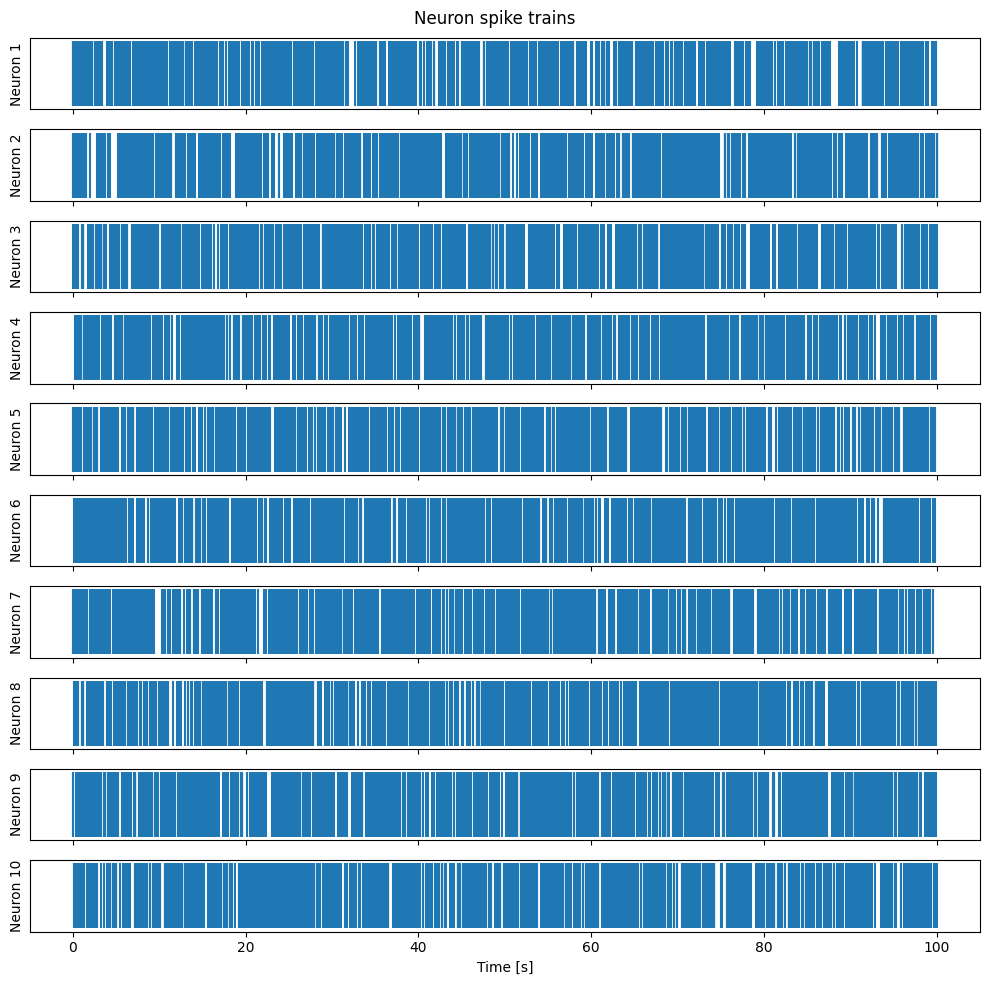

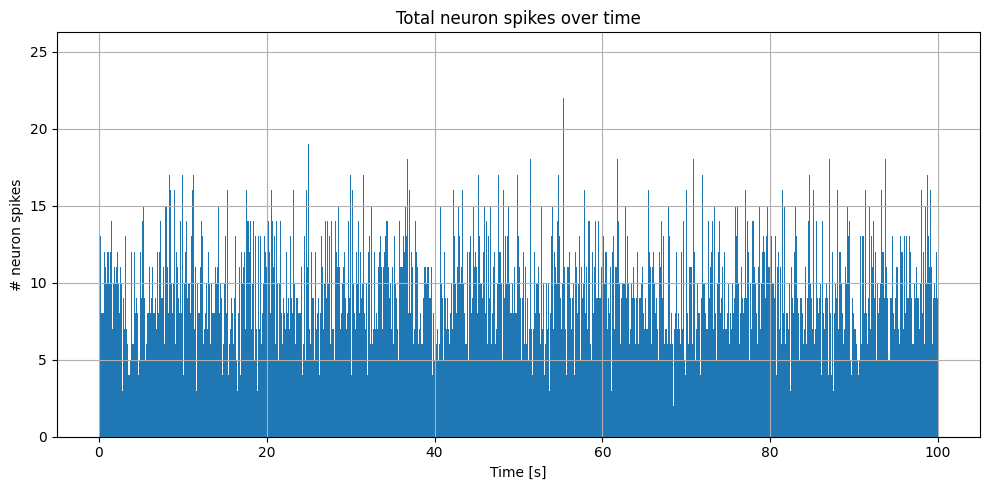

In [7]:
spike_idx_accepted_A = generate_spike_times(lambda_t_A, Nn)
plot_spike_times(spike_idx_accepted_A, dt, neuron_idx=range(10))
plot_spike_time_stats(spike_idx_accepted_A, dt, Nt)

2) *The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by an exponential distribution $p(\lambda_t) = r \exp [- r \lambda_t]$ with $r=0.1.$*

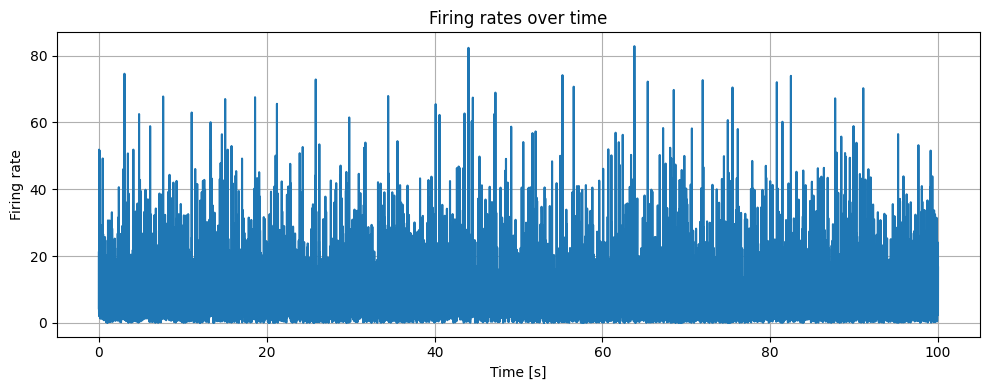

In [8]:
# generate firing rates
lambda_t_B = np.random.exponential(scale=1.0/r, size=Nt)
# plot the firing rates
plot_firing_rates(lambda_t_B, dt)

Max. firing rate: 82.79981307998287
Avg. number of spikes per neuron: 8284.64
After Thinning: 991.96


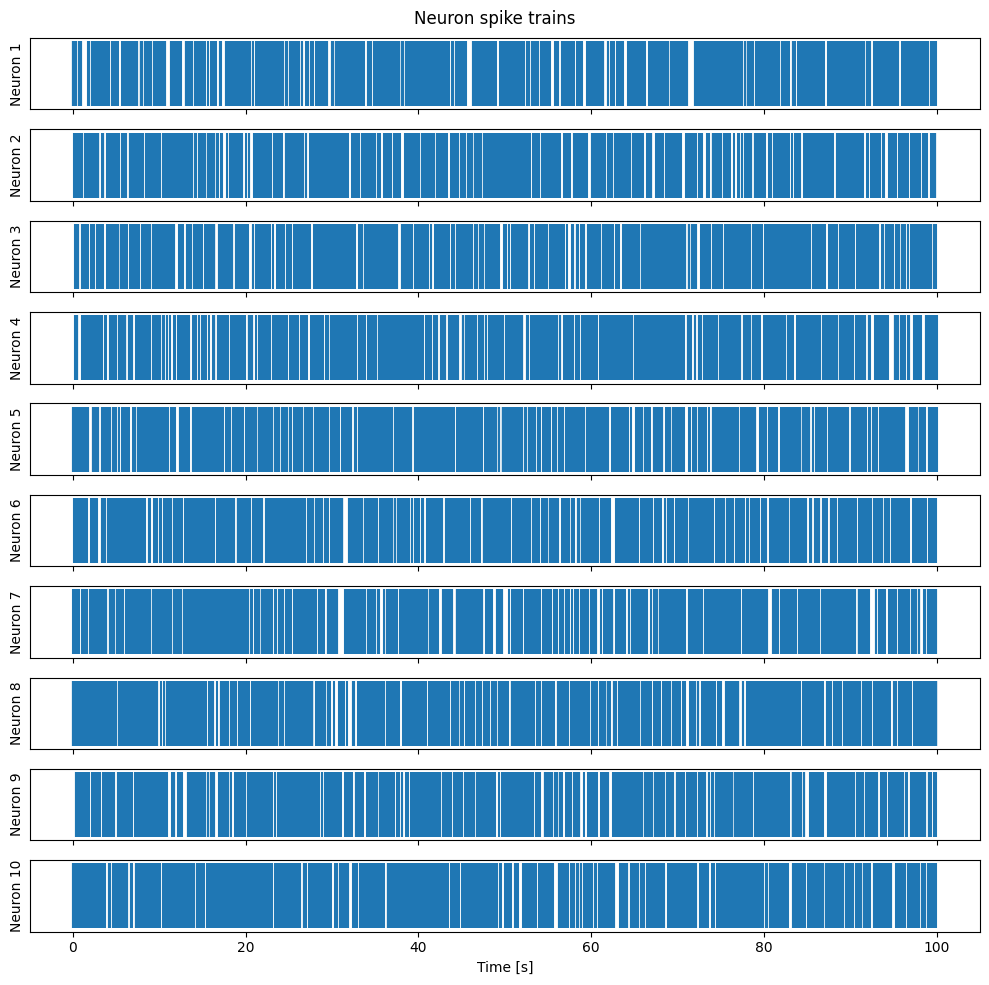

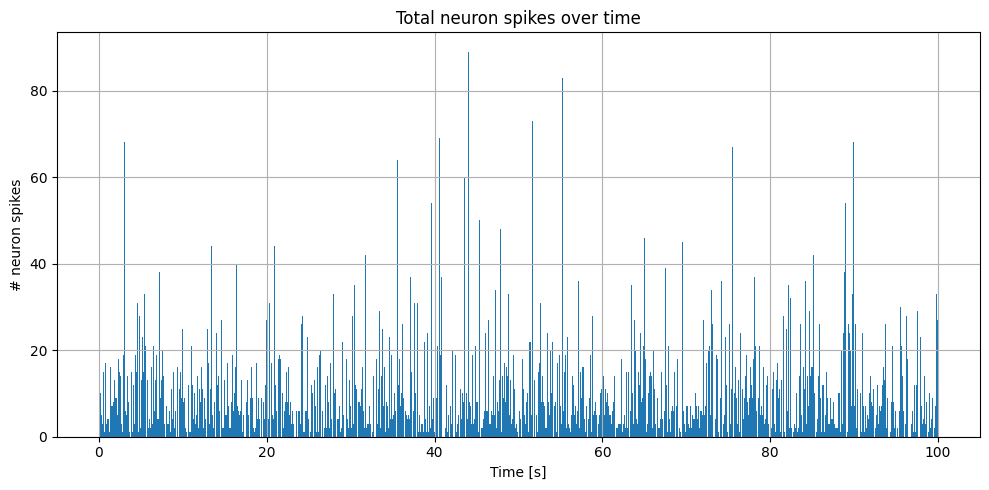

In [9]:
# generate spike times
spike_idx_accepted_B = generate_spike_times(lambda_t_B, Nn)
# plot
plot_spike_times(spike_idx_accepted_B, dt, neuron_idx=range(10))
plot_spike_time_stats(spike_idx_accepted_B, dt, Nt)

Analysing the avalanches for both scenarios:
- A) independent firing rates for each neuron
- B) same firing rate for each neuron

In [10]:
def compute_avalanche_sizes(spike_idx, Nt, dt):
    all_idx = np.concatenate(spike_idx)  # concatenate into one
    counts, _ = np.histogram(all_idx, bins=Nt, range=(0, Nt)) # get counts for all time bins
    activity = (counts > 0).astype(int) # boolean array (true if activity in time bin)
    # detect changes in activity (starts/ends of avalanches) via bin differences
    # prepend/append 0 to handle boundaries
    activity = np.r_[0, activity, 0]
    diffs = activity[:-1]-activity[1:]
    # seperate starts and ends of avalanches (indicated by signs)
    starts = np.where(diffs == -1)[0] + 1 # avalanche start time bin indices
    ends   = np.where(diffs == 1)[0] + 1 # avalanche end time bin indices
    # get avalanche sizes via difference between starts and ends
    avalanche_sizes = dt*(ends-starts)
    
    return avalanche_sizes

In [11]:
avalanche_sizes_A = compute_avalanche_sizes(spike_idx_accepted_A, Nt, dt)
avalanche_sizes_B = compute_avalanche_sizes(spike_idx_accepted_B, Nt, dt)
print(f"Scenario A: {len(avalanche_sizes_A)} avalanches, with average size {np.mean(avalanche_sizes_A)}")
print(f"Scenario B: {len(avalanche_sizes_B)} avalanches, with average size {np.mean(avalanche_sizes_B)}")

Scenario A: 1 avalanches, with average size 100.0
Scenario B: 833 avalanches, with average size 0.10911164465786316


With the given parameters for the exponential firing distribution, we obtain firing rates which in both scenarios tend to yield around 1000 spikes per neuron within the 100s. There are notable differences in the avalanche behavior: In Scenario A, where all neurons have independent firing rates, we observe almost continuous neuron activity, meaning only few avalanches of large size (or, at times, a singular avalanche over the entire time span).

In Scenario B, where all neurons have the same firing rate, there appears to be more synchronised firing behaviour; we observe a multitude of singular bins with spikes and small avalanches. Notably, there tend to be more neurons firing at the same time as in scenario A.

In the following, the parameters of the exponential firing rate distribution are adjusted to yield lower firing rates and again observe the avalanche behaviour.

### Adjusted exponential firing rate distribution

Let's see what happens with lower firing rates!

In [12]:
# parameters
r = 1
T = 100 # total time window in s
dt = 0.01 # time step in s
Nt = int(T/dt) # number of time steps
Nn = 100 # number of neurons

Scenario A): All neurons have independent firing rates

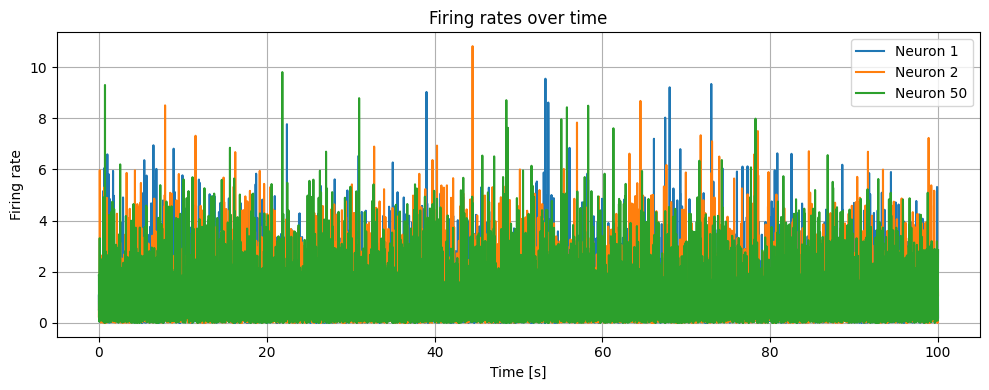

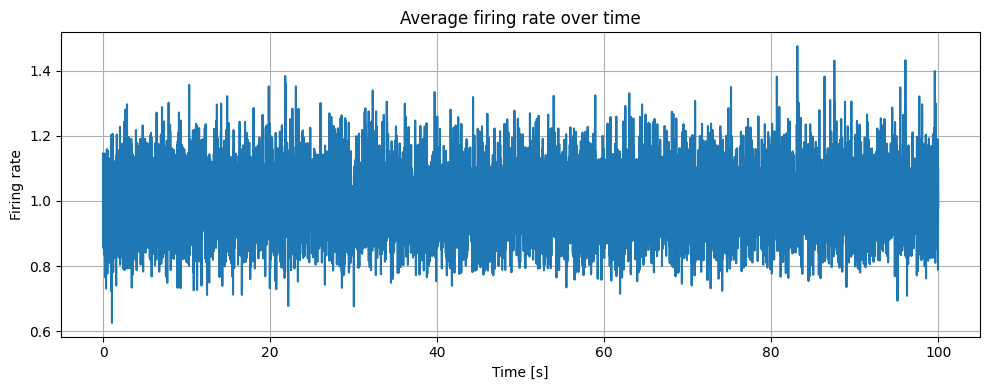

In [13]:
# generate firing rates
lambda_t_A = np.random.exponential(scale=1.0/r, size=(Nt, Nn))
plot_firing_rates(lambda_t_A, dt, neuron_idx=[0, 1, 49])
plot_avg_firing_rate(lambda_t_A, dt)

Max. firing rate: 12.476271432320626
Avg. number of spikes per neuron: 1250.44
After Thinning: 100.75


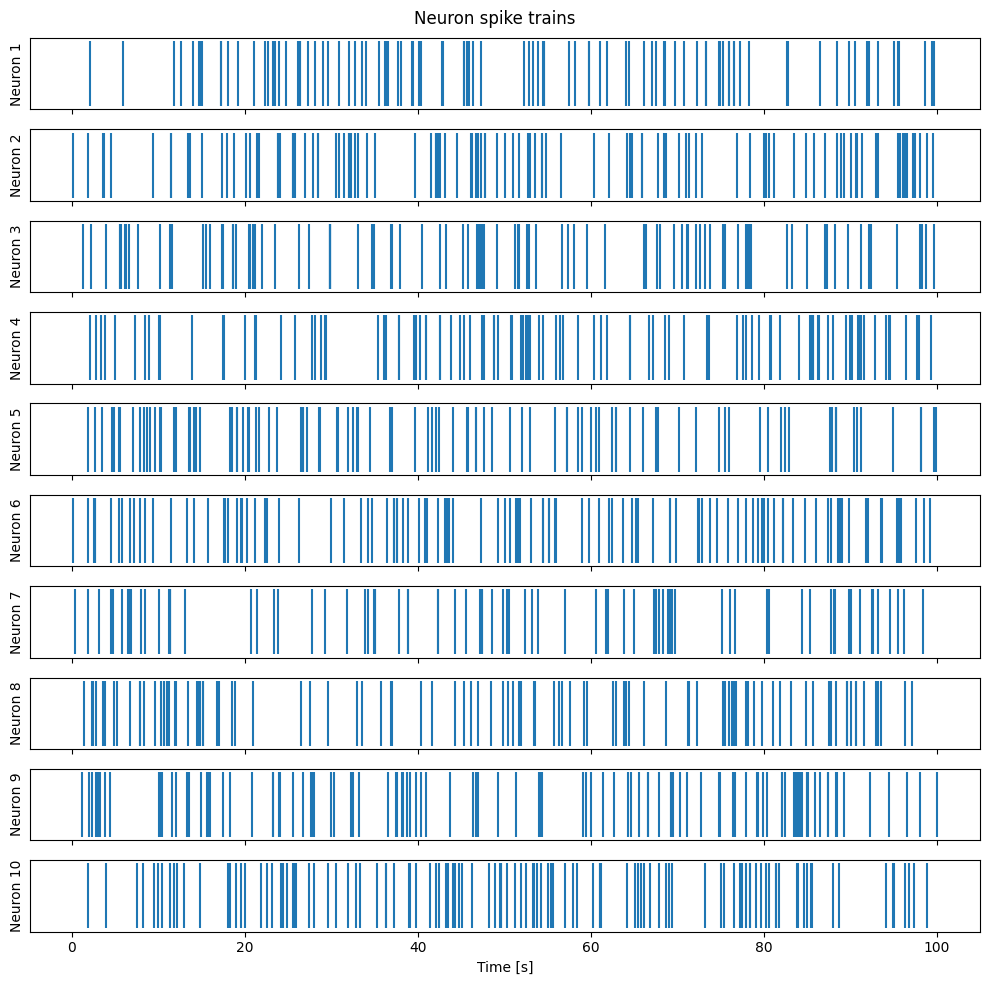

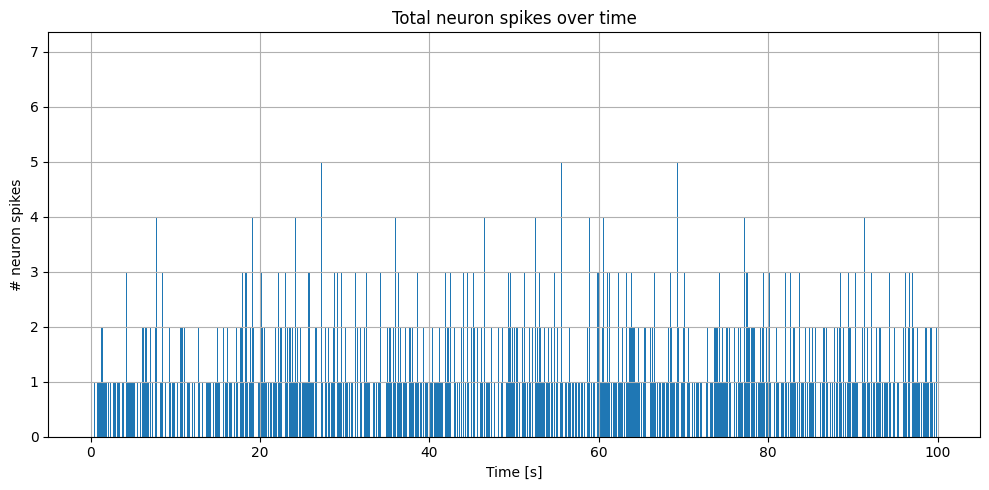

In [14]:
# generate spike times
spike_idx_accepted_A = generate_spike_times(lambda_t_A, Nn)
plot_spike_times(spike_idx_accepted_A, dt, neuron_idx=range(10))
plot_spike_time_stats(spike_idx_accepted_A, dt, Nt)

Scenario B): All neurons have the same firing rate

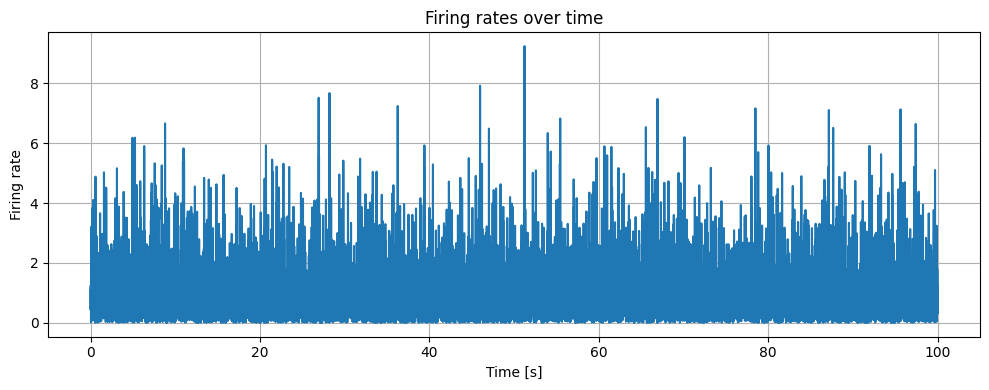

In [15]:
# generate firing rates
lambda_t_B = np.random.exponential(scale=1.0/r, size=Nt)
plot_firing_rates(lambda_t_B, dt)

Max. firing rate: 9.234655914475528
Avg. number of spikes per neuron: 920.34
After Thinning: 99.81


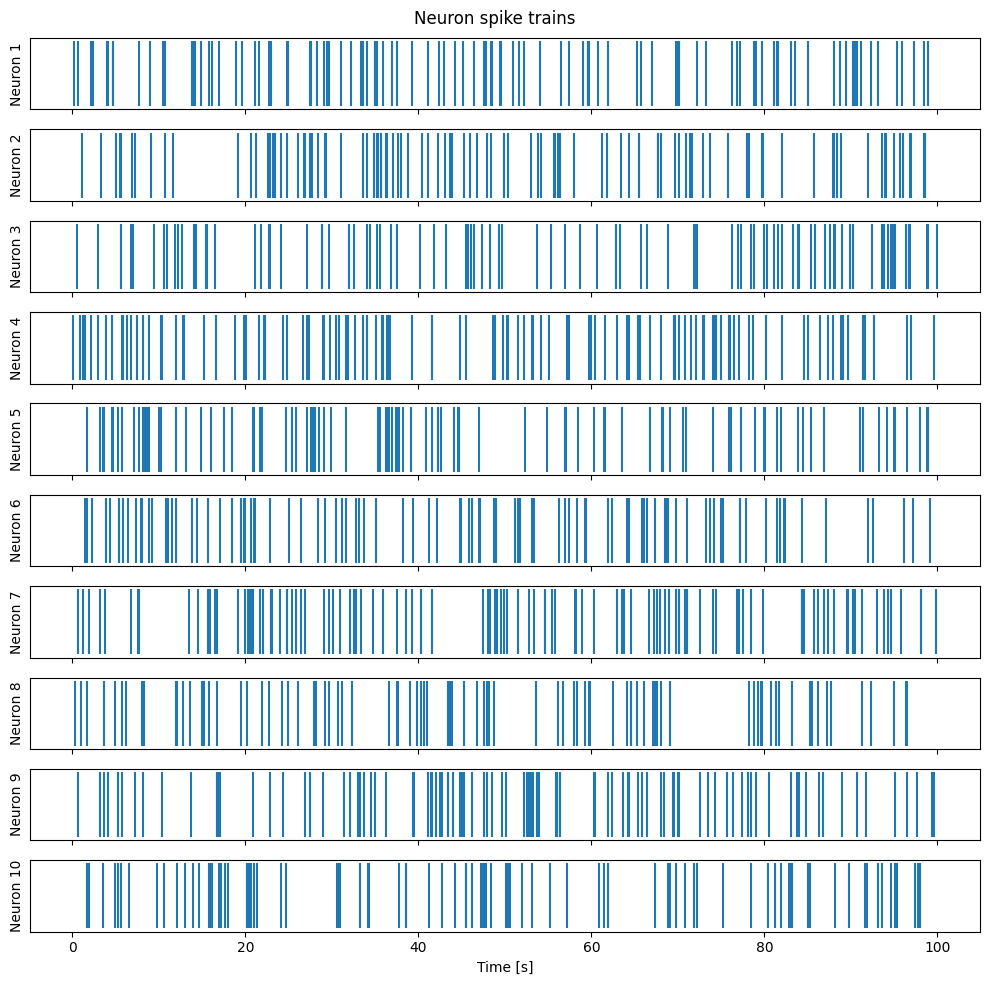

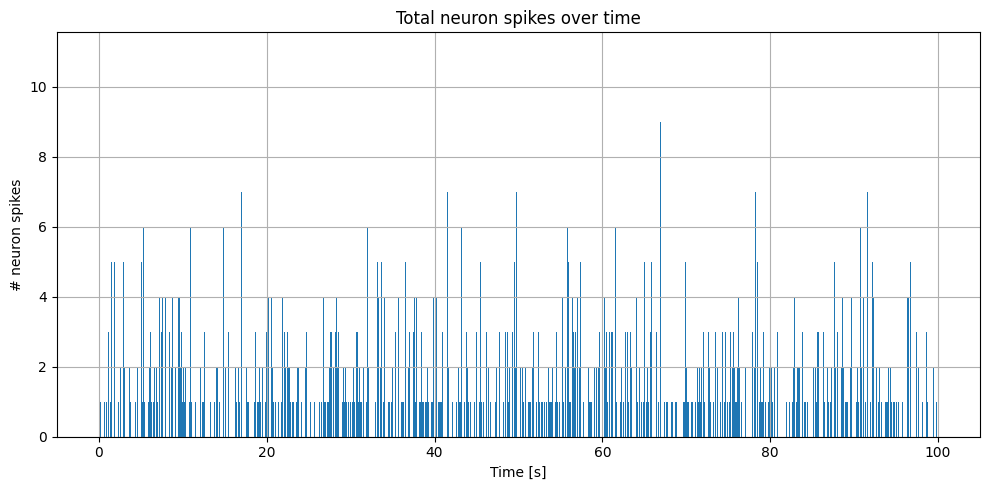

In [16]:
# generate spike times
spike_idx_accepted_B = generate_spike_times(lambda_t_B, Nn)
plot_spike_times(spike_idx_accepted_B, dt, neuron_idx=range(10))
plot_spike_time_stats(spike_idx_accepted_B, dt, Nt)

Analysing the avalanches:

In [17]:
avalanche_sizes_A = compute_avalanche_sizes(spike_idx_accepted_A, Nt, dt)
avalanche_sizes_B = compute_avalanche_sizes(spike_idx_accepted_B, Nt, dt)
print(f"Scenario A: {len(avalanche_sizes_A)} avalanches, with average size {np.mean(avalanche_sizes_A)}")
print(f"Scenario B: {len(avalanche_sizes_B)} avalanches, with average size {np.mean(avalanche_sizes_B)}")

Scenario A: 2336 avalanches, with average size 0.02707191780821918
Scenario B: 2514 avalanches, with average size 0.019904534606205254


Now the effect is less pronounced as scenario A exhibits many avalanches of smaller size as well, but there are still slightly less and slightly bigger avalanches than in scenario B.

## Gamma firing rate distribution

3) *The firing rate $\lambda_t$ is the same for each neuron, and generated as random variables extracted each time step by gamma distribution with mean 0.2 and variance 10.*

For mean 0.2, variance 10 we need shape $\alpha = 0.004$ and scale $\theta = 50$.

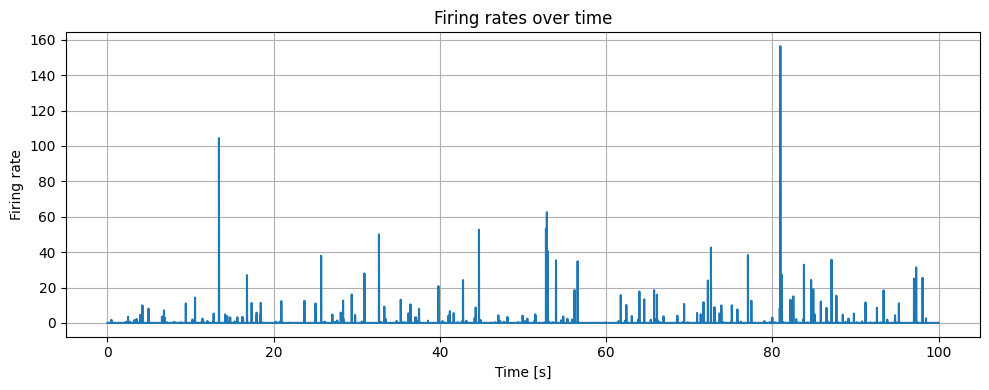

In [18]:
# generate firing rates for all neurons
lambda_t_B = np.random.gamma(shape = 0.004, scale = 50, size=Nt)
# plot
plot_firing_rates(lambda_t_B, dt)

Max. firing rate: 156.42260583693337
Avg. number of spikes per neuron: 15645.76
After Thinning: 18.53


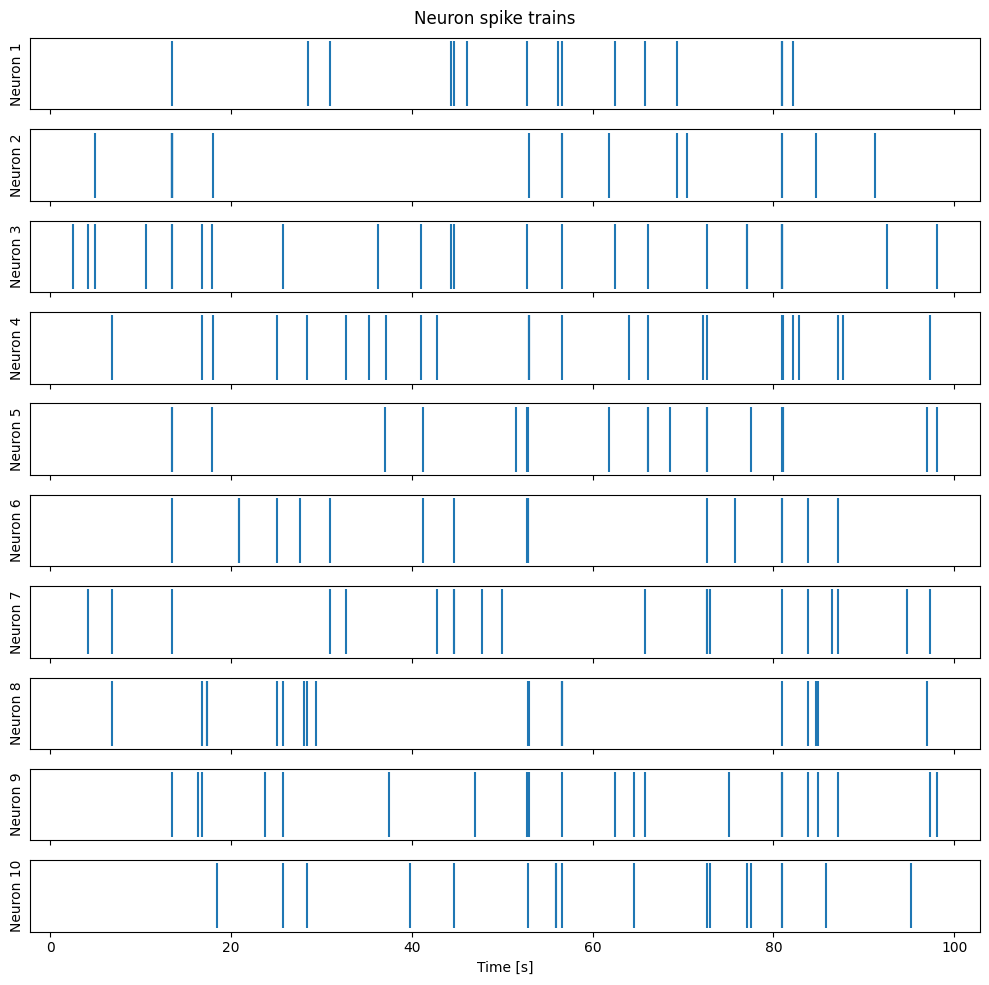

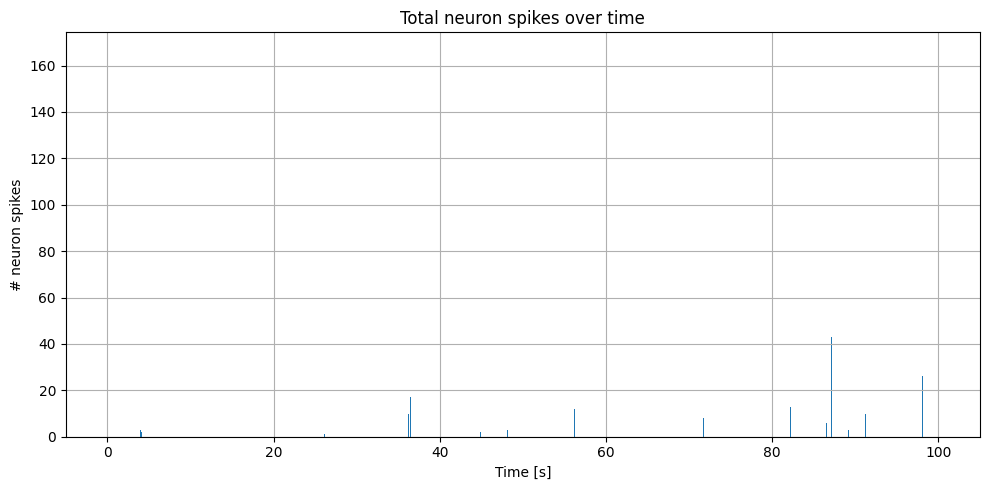

In [19]:
# generate spike times
t_spikes_accepted_B = generate_spike_times(lambda_t_B, Nn)
# plot
plot_spike_times(t_spikes_accepted_B, dt, neuron_idx=range(10))
plot_spike_time_stats(t_spikes_accepted_B, dt, Nt)

For the fun of it, let's also try simulating this one with independent firing rates for each neuron:

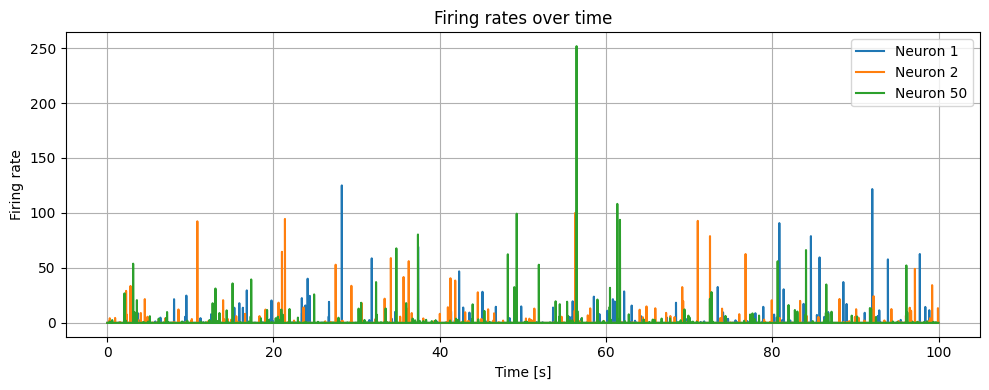

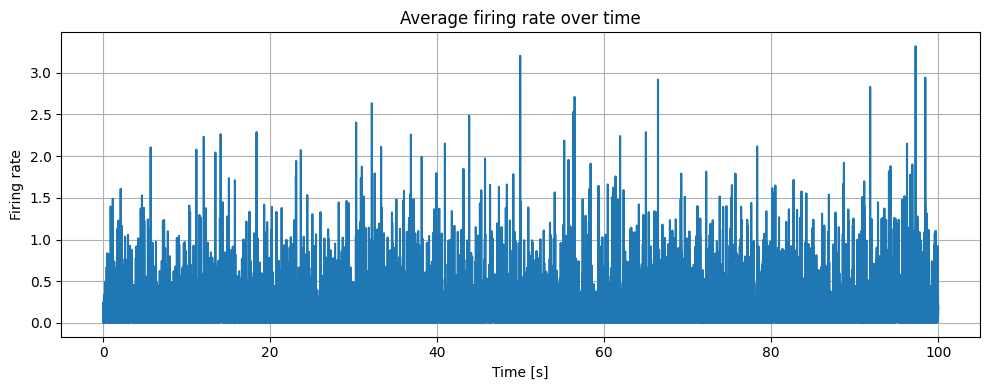

In [20]:
# generate firing rates for all neurons
lambda_t_A = np.random.gamma(shape = 0.004, scale = 50, size=(Nt, Nn))
# plot
plot_firing_rates(lambda_t_A, dt, neuron_idx=[0, 1, 49])
plot_avg_firing_rate(lambda_t_A, dt)

Max. firing rate: 273.53211140919996
Avg. number of spikes per neuron: 27357.52
After Thinning: 19.7


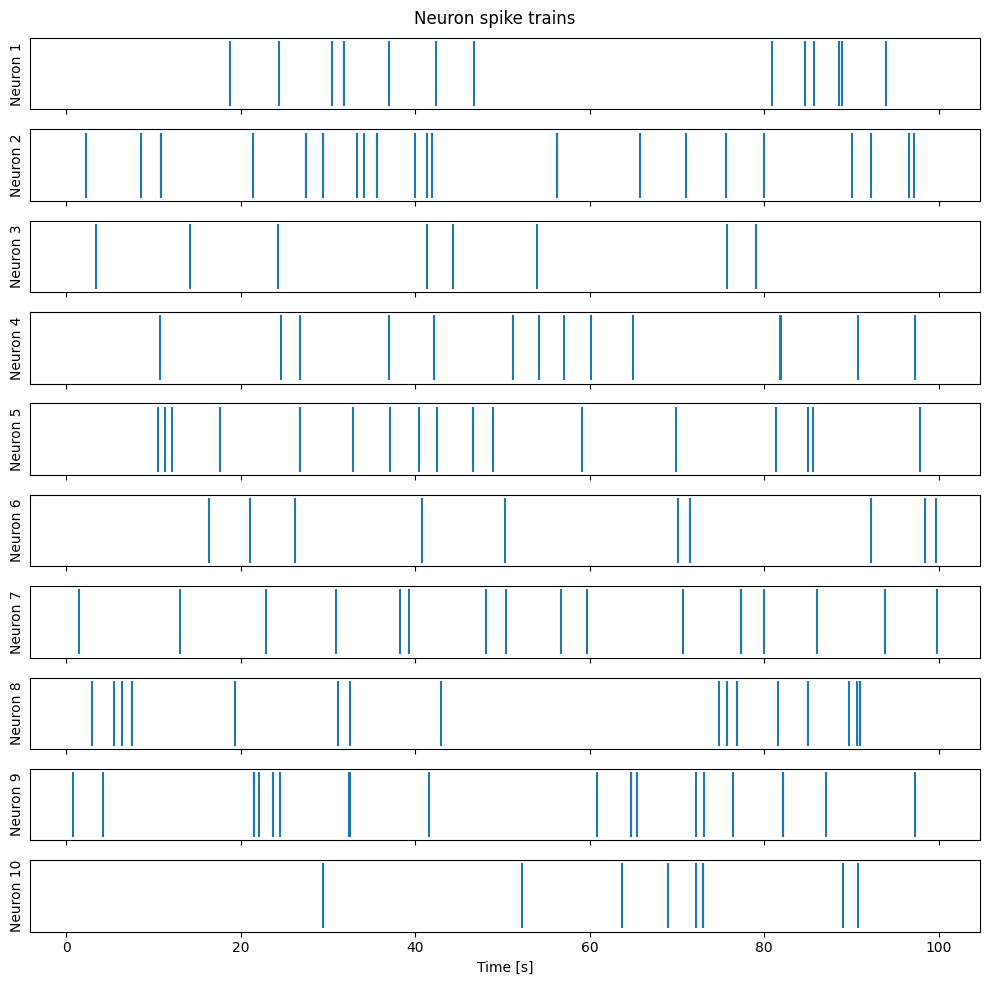

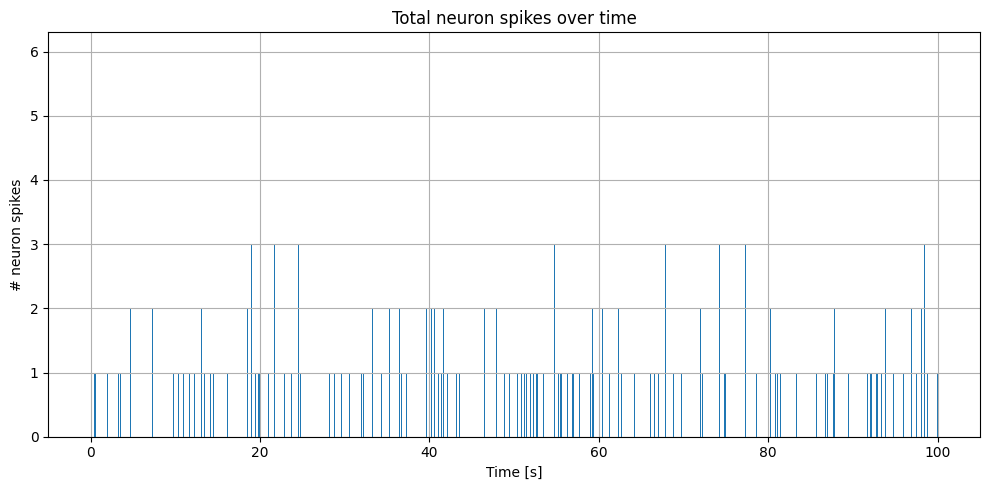

In [21]:
# generate spike times
t_spikes_accepted_A = generate_spike_times(lambda_t_A, Nn)
# plot
plot_spike_times(t_spikes_accepted_A, dt, neuron_idx=range(10))
plot_spike_time_stats(t_spikes_accepted_A, dt, Nt)

In [22]:
avalanche_sizes_A = compute_avalanche_sizes(t_spikes_accepted_A, Nt, dt)
avalanche_sizes_B = compute_avalanche_sizes(t_spikes_accepted_B, Nt, dt)
print(f"Scenario A: {len(avalanche_sizes_A)} avalanches, with average size {np.mean(avalanche_sizes_A)}")
print(f"Scenario B: {len(avalanche_sizes_B)} avalanches, with average size {np.mean(avalanche_sizes_B)}")

Scenario A: 1271 avalanches, with average size 0.01167584579071597
Scenario B: 164 avalanches, with average size 0.010365853658536584


With the Gamma distribution we can observe how the same firing rate for all neurons (Scenario B) results in a very synchronised spike behavior, with few very small avalanches/mostly single-bin spikes, but many neurons firing at the same time. In the case of independent firing rates (scenario A), we have significantly more avalanches or spikes within a single bin, but significantly less neurons firing at the same time.